# Hito 3
#### Minería de Datos CC5205-1
### Proyecto: Impacto del uso de herramientas de estudio y espacios pedagógicos al desempeño en la prueba PAES.
#### Grupo 3
#### Integrantes: Martín Avendaño, Javier Contreras, Antonia Del Castillo, Matías Miranda, Gabriela Urbina.


## Introducción: Problema y motivación.

El análisis inicial de datos se centró en investigar el impacto de la necesidad de los espacios pedagógicos, tales como laboratorios, bibliotecas y salas de computadoras, en el desempeño de los estudiantes en las pruebas de selección para la educación superior. El interés en esta área de estudio surgió de las experiencias individuales de los estudiantes previas a su ingreso a la universidad. Al comenzar esta nueva etapa académica, los estudiantes tienen mayor acceso y  cantidad de áreas de estudio, en comparación con la etapa escolar, afectando positivamente en su desempeño universitario.

A partir de esa experiencia, el grupo de investigación se propuso determinar si el acceso a estos entornos se correlaciona con un mayor rendimiento académico. El objetivo es discernir si esta percepción es subjetiva por parte de los estudiantes o si existe una relación empírica cuantificable entre el entorno de estudio y el desempeño académico evaluado.

Se eligió un DataSet de la plataforma Datos Públicos del Ministerio de Educación, más específicamente, del Centro de Estudios Mineduc (CEM), que reúne datos sobre la rendición de la prueba de acceso a la educación superior (PAES) en el año 2023. De aquí se seleccionaron dos archivos con información sobre los resultados de los inscritos para la prueba, uno con detalles sobre puntajes por prueba, y otro con atributos correspondientes a la caracterización socioeconómica de los inscritos.

## Exploración de datos.

En la tabla “Inscritos Puntajes” se encuentran datos relevantes que serán de importancia mencionar, incluyendo el rol base de datos del establecimiento al cual pertenece el estudiante. Además, se registran el código de enseñanza que describe la naturaleza del establecimiento, el nombre oficial de la unidad educativa, y su modalidad educacional. También se incluye el grupo dependencia, que especifica si el establecimiento es particular, municipal, entre otros. Otros datos importantes incluyen el promedio de notas, puntaje NEM (Notas de Enseñanza Media), el ranking del estudiante y los resultados de cada prueba de selección rendida. Estos resultados se detallan con la distribución de respuestas entre correctas, erradas y omitidas.

La tabla “Socioeconómicos”, proporciona una variedad de datos que son cruciales para comprender el contexto y las condiciones de vida de los estudiantes. Entre los aspectos relevantes se incluyen la identificación del estudiante a través del MRUN, datos demográficos como el sexo y la fecha de nacimiento, así como información sobre la ocupación y el estado laboral del estudiante. Además, se detalla la estructura familiar del estudiante, incluyendo quién es el jefe de familia, la actividad laboral principal del jefe de familia y el ingreso per cápita del hogar. Esta tabla también ofrece información sobre la educación de los padres, la participación en instituciones de educación superior y detalles sobre la carrera y la titulación cursada por el estudiante. Estos datos socioeconómicos son fundamentales para explorar las posibles relaciones entre el entorno familiar y el rendimiento académico, así como para identificar posibles factores de influencia en los resultados de las pruebas de selección para la educación superior. Asimismo, entrega información sobre las condiciones del establecimiento educacional, las áreas a las que pueden acceder los estudiantes, y a qué dispositivos tienen acceso.

Para estudiar los datos, se utilizaron ambos datasets, realizando un merge entre ambas tablas. Durante el proceso de limpieza de los datos, la mayoría ya tenía un formato adecuado para su análisis. Sin embargo, se ajustaron ciertas columnas para poder realizar operaciones matemáticas sobre ellas. Además, se optó por excluir aquellos datos que no entregaban información relevante para el estudio, como aquellas etiquetadas como ‘prefiero no responder’, generando una coherencia de los datos utilizados en el análisis.


In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

inscritos = pd.read_table('./A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv', sep=';', low_memory=False)
socioeconomico = pd.read_table('./B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv', sep=';')

inscritos = inscritos.drop(columns=['RBD'])
columnas_duplicadas = set(inscritos.columns).intersection(socioeconomico.columns)
columnas_duplicadas.remove('MRUN')
inscritos = inscritos.drop(columns=columnas_duplicadas)

df = socioeconomico.merge(inscritos, on='MRUN')

df.shape


(296812, 152)

In [2]:
df['PROMEDIO_CM_MAX'] = df['PROMEDIO_CM_MAX'].str.replace(',', '.')
df['PROMEDIO_CM_MAX'] = pd.to_numeric(df['PROMEDIO_CM_MAX'], errors='coerce')
df['ANYO_PROCESO'] = pd.to_numeric(df['ANYO_PROCESO'], errors='coerce')
df['ANYO_DE_EGRESO'] = pd.to_numeric(df['ANYO_DE_EGRESO'], errors='coerce')

for i in range(1,10):
    df['ESPACIO_'+str(i)] = df['ESPACIO_'+str(i)].str.replace('N', '0').str.replace('S', '1').astype(float).astype(int)

for i in range(1,4):
    df['DISPOSITIVO_'+str(i)] = df['DISPOSITIVO_'+str(i)].str.replace('N', '0').str.replace('S', '1').astype(float).astype(int)

df = df[df['CONEXION_INSUFICIENTE'] != 9]
df = df[(df['PROMEDIO_CM_MAX'] != 0) & (df['PTJE_NEM'] != 0)]

In [3]:
a=df.iloc[:, :1].head()
b=df.iloc[:, 20:24].head()
c=df.iloc[:, 29:33].head()
d=df.iloc[:, 53:57].head()

muestra= pd.concat([a, b, c, d], axis=1)
muestra

MRUN  ESPACIO_1  ESPACIO_2  ESPACIO_3  ESPACIO_4  USO_ESPACIO_1  \
0    3703667          0          0          0          0              0   
4   22654139          0          0          0          0              0   
7   14080890          1          1          1          0              2   
11  12835207          0          1          0          0              0   
14   3340275          1          0          0          0              2   

    USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4 PROMEDIO_NOTAS  PTJE_NEM  \
0               0              0              0           5,15       463   
4               0              0              0            6,4       830   
7               4              2              0           5,23       493   
11              4              0              0            6,6       887   
14              0              0              0            6,2       774   

    PORC_SUP_NOTAS  PTJE_RANKING  
0               80           546  
4               10           875  
7               10           501  
11              10           912  
14              20           810

Los datos fueron sometidos a una variedad de análisis descriptivos y se crearon visualizaciones gráficas con el fin de profundizar en su comprensión y extraer conocimientos valiosos. Es esencial emplear diversos enfoques analíticos para obtener una visión completa y precisa de los datos en estudio. No solo se trata de generar múltiples visualizaciones para atributos específicos, sino también de considerar la importancia relativa de cada atributo en función de cómo se presenta en las visualizaciones, lo cual influye en la construcción de modelos futuros.

Los métodos de exploración de datos que se utilizaron fueron los siguientes:

Estadísticas de resumen: con el objetivo de familiarizarnos con los datos y comprender su distribución, se pueden realizar análisis descriptivos de la información que nos entrega, calculando promedios, medianas, desviaciones estándar, máximos y mínimos de los puntajes, por ejemplo. Con esto, se obtendría una visión general del perfil de los estudiantes y su rendimiento académico.

Exploración de relaciones: se puede verificar la relación entre variables como el promedio de notas y la accesibilidad a tecnologías, el puntaje en las pruebas y el uso de espacios pedagógicos del establecimiento, mediante su correlación. Esto ayudará en el estudio de los posibles factores que inciden en el rendimiento académico de los estudiantes.

Visualización de datos: a través de gráficos como los histogramas, diagramas de dispersión y diagramas de caja se puede visualizar la distribución de las variables, detectando outliers y patrones dentro de los datos.

In [4]:
muestra.describe()

MRUN  ESPACIO_1  ESPACIO_2  ESPACIO_3  ESPACIO_4  \
count  5.000000e+00   5.000000   5.000000   5.000000        5.0   
mean   1.132284e+07   0.400000   0.400000   0.200000        0.0   
std    8.063274e+06   0.547723   0.547723   0.447214        0.0   
min    3.340275e+06   0.000000   0.000000   0.000000        0.0   
25%    3.703667e+06   0.000000   0.000000   0.000000        0.0   
50%    1.283521e+07   0.000000   0.000000   0.000000        0.0   
75%    1.408089e+07   1.000000   1.000000   0.000000        0.0   
max    2.265414e+07   1.000000   1.000000   1.000000        0.0   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4    PTJE_NEM  \
count       5.000000        5.00000       5.000000            5.0    5.000000   
mean        0.800000        1.60000       0.400000            0.0  689.400000   
std         1.095445        2.19089       0.894427            0.0  197.358304   
min         0.000000        0.00000       0.000000            0.0  463.000000   
25%         0.000000        0.00000       0.000000            0.0  493.000000   
50%         0.000000        0.00000       0.000000            0.0  774.000000   
75%         2.000000        4.00000       0.000000            0.0  830.000000   
max         2.000000        4.00000       2.000000            0.0  887.000000   

       PORC_SUP_NOTAS  PTJE_RANKING  
count        5.000000      5.000000  
mean        26.000000    728.800000  
std         30.495901    191.597756  
min         10.000000    501.000000  
25%         10.000000    546.000000  
50%         10.000000    810.000000  
75%         20.000000    875.000000  
max         80.000000    912.000000

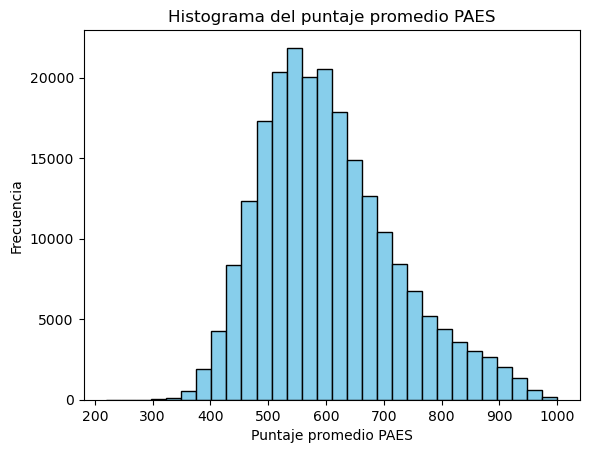

In [5]:
plt.hist(df['PROMEDIO_CM_MAX'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Puntaje promedio PAES')
plt.ylabel('Frecuencia')
plt.title('Histograma del puntaje promedio PAES')
plt.show()

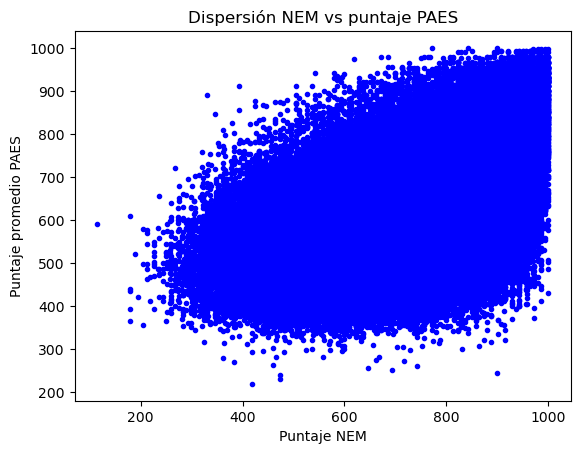

In [6]:
plt.scatter(df['PTJE_NEM'], df['PROMEDIO_CM_MAX'], color='BLUE', marker='.')

plt.xlabel('Puntaje NEM')
plt.ylabel('Puntaje promedio PAES')
plt.title('Dispersión NEM vs puntaje PAES')
plt.show()

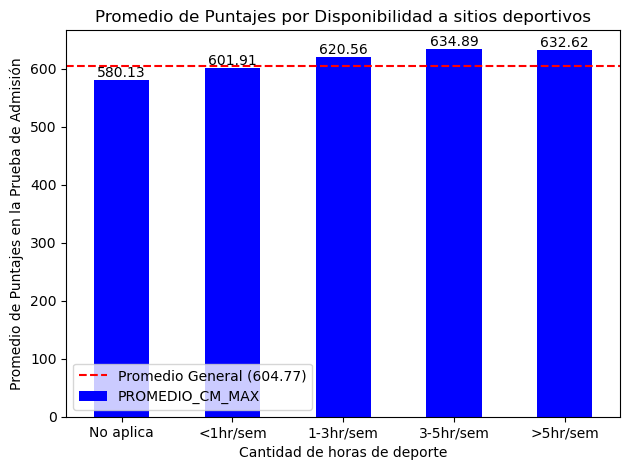

In [7]:
estudio_3 = df[['USO_ESPACIO_7','PROMEDIO_CM_MAX']]
promedio_por_deporte = estudio_3.groupby('USO_ESPACIO_7')['PROMEDIO_CM_MAX'].mean()
ax = promedio_por_deporte.plot(kind='bar', color=['blue'])

# Agregar etiquetas en las barras
for i, v in enumerate(promedio_por_deporte):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')


# Cambiar los nombres de las categorías en el eje x
plt.xticks(range(len(promedio_por_deporte.index)), ['No aplica', '<1hr/sem', '1-3hr/sem', '3-5hr/sem', '>5hr/sem'], rotation=0)

# Agregar una línea de referencia para el promedio general de puntajes
promedio_general = estudio_3['PROMEDIO_CM_MAX'].mean()
plt.axhline(y=promedio_general, color='red', linestyle='--', label=f'Promedio General ({promedio_general:.2f})')

plt.title('Promedio de Puntajes por Disponibilidad a sitios deportivos')
plt.xlabel('Cantidad de horas de deporte')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.legend()
plt.tight_layout()
plt.show()

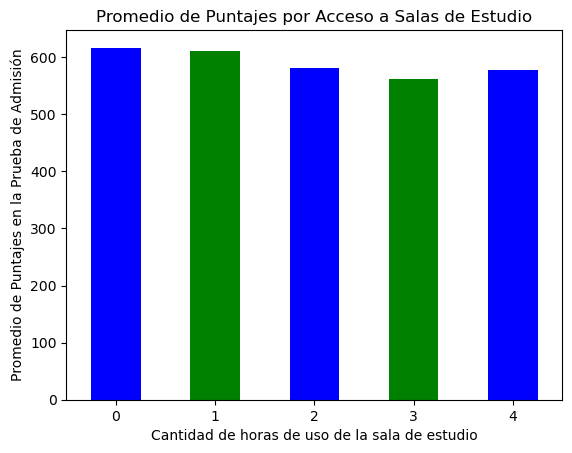

In [8]:
estudios = df[['USO_ESPACIO_2','PROMEDIO_CM_MAX']]
promedio_por_biblioteca = estudios.groupby('USO_ESPACIO_2')['PROMEDIO_CM_MAX'].mean()
promedio_por_biblioteca
promedio_por_biblioteca.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por Acceso a Salas de Estudio')
plt.xlabel('Cantidad de horas de uso de la sala de estudio')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

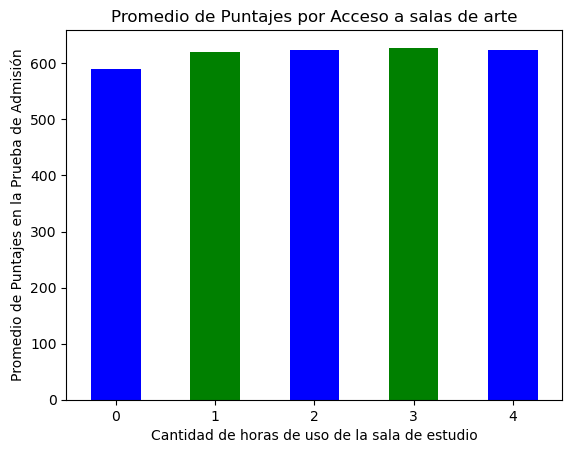

In [9]:
estudios = df[['USO_ESPACIO_4','PROMEDIO_CM_MAX']]
promedio_por_biblioteca = estudios.groupby('USO_ESPACIO_4')['PROMEDIO_CM_MAX'].mean()
promedio_por_biblioteca
promedio_por_biblioteca.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por Acceso a salas de arte')
plt.xlabel('Cantidad de horas de uso de la sala de estudio')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

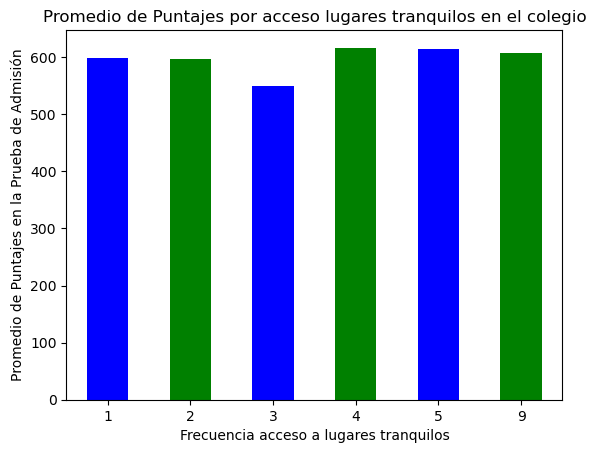

In [10]:
promedio_por_tranquilidad = df.groupby('TRANQUILIDAD_COLEGIO')['PROMEDIO_CM_MAX'].mean()
promedio_por_tranquilidad.plot(kind='bar', color=['blue', 'green'])
plt.title('Promedio de Puntajes por acceso lugares tranquilos en el colegio')
plt.xlabel('Frecuencia acceso a lugares tranquilos')
plt.ylabel('Promedio de Puntajes en la Prueba de Admisión')
plt.xticks(rotation=0)
plt.show()

Inicialmente, para analizar si hay correlación entre los datos, se crearon gráficos de barras, donde se buscó una tendencia en cuanto a la relación entre los puntajes de las pruebas y el uso de diferentes espacios (en horas) de los establecimientos educacionales, como laboratorios, espacios deportivos y salas de estudio. Además, se llevó a cabo un estudio sobre los colegios municipales, para ver si existían diferencias con el caso global.

También se realizaron gráficos de caja, para explorar la relación entre el promedio de las pruebas y los índices socioeconómicos, específicamente en relación al ingreso per cápita del grupo familiar. Esto permitió visualizar los cuartiles e identificar una correlación entre ambas variables.

In [11]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'notebook'

distribution = df[(df['PROMEDIO_CM_MAX'] != 0) & (df['INGRESO_PERCAPITA_GRUPO_FA'] != 99)]
fig = px.box(distribution, x='INGRESO_PERCAPITA_GRUPO_FA', y='PROMEDIO_CM_MAX')
fig.show()

## Preguntas y problemas.

Con los indicios de las débiles relaciones vistas en los gráficos que se usaron en un principio para visualizar las distribuciones de los datos con respecto al promedio del puntaje obtenido por los alumnos, se calculó una matriz de correlación para comparar la correlación de Pearson, principalmente entre las variables relacionadas con el uso de los espacios pedagógicos por parte de los alumnos con el puntaje promedio obtenido en la prueba de selección PAES. La matriz de correlación fue graficada en un mapa de calor generado con la biblioteca seaborn, y permitió identificar ligeras correlaciones entre algunas de las variables en estudio, previamente discretizadas, pero que no revelan una relación lineal directa con la distribución de los promedios de los puntajes de los alumnos. Estos valores para la correlación con el puntaje promedio son menores en magnitud al 0.3, siendo los más significativos dentro del grupo de variables de uso de los espacios del establecimiento educativo la infraestructura deportiva y los laboratorios de ciencias.

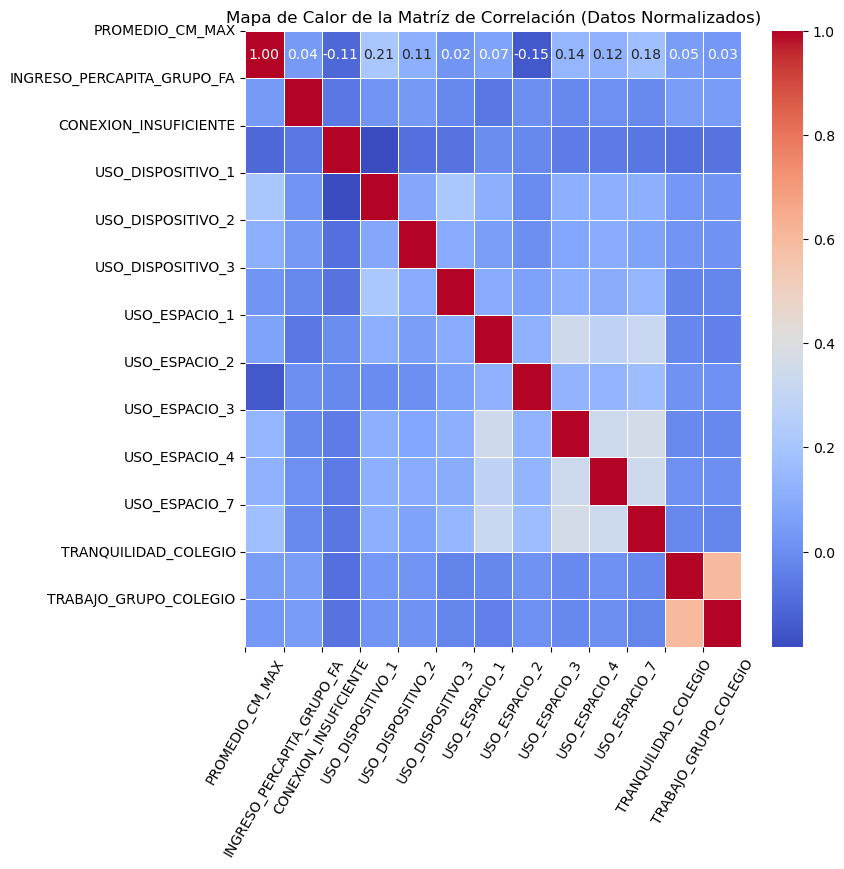

In [12]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

dfcorr = df[['PROMEDIO_CM_MAX', 'INGRESO_PERCAPITA_GRUPO_FA', 'CONEXION_INSUFICIENTE', 'USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 'USO_ESPACIO_7', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']]

scaler = StandardScaler()
df_normalizado = scaler.fit_transform(dfcorr)
df_normalizado = pd.DataFrame(df_normalizado)

plt.figure(figsize=(8,8))
corr = df_normalizado.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.xticks(range(len(dfcorr.columns)), dfcorr.columns, rotation=60)
plt.yticks(range(len(dfcorr.columns)), dfcorr.columns, rotation=0)
plt.title('Mapa de Calor de la Matríz de Correlación (Datos Normalizados)')
plt.show()

En base a estas variables, se tiene que la relación lineal de los datos con el puntaje promedio no es muy directa, lo que complicaría el desarrollo de un modelo predictivo en base al puntaje promedio, que era una de las alternativas que se barajaban. Aunque podría suceder que al agregar las variables dentro de un modelo predictivo, se logre un mejor desempeño. A partir de esto, si bien la no correlación no indica mala predictibilidad, se llegó a la conclusión que este estudio carecería de un valor social significativo, ya que predecir el puntaje según los atributos económicos no entrega información que responda la pregunta original.

Por otro lado, un diferente enfoque que se le puede dar al proyecto puede ser en torno a clustering sobre estos datos, y ver qué cosas tienen en común los estudiantes con puntajes similares, por ejemplo, acceso a internet, bibliotecas, uso de computadores. Y así surge la pregunta:
¿Existirán grupos (clusters) de alumnos, que tengan similitudes según su puntaje obtenido?

Este problema, además de requerir un análisis profundo, y por ello, un entrenamiento de modelos extensivo, posee más versatilidad en cuanto al desarrollo de la propia problemática, puesto que se dependerá de ciertos atributos variados no estrictamente estáticos, dando dinamismo al cómo abordar este problema.

También, se puede revisar casos más específicos, cómo el comportamiento de los inscritos según su principal motivación para dar la prueba, dado que existen casos particulares como quienes dan la prueba porque lo obligaron a inscribirse en el colegio, o son profesionales de la educación y desean conocer el instrumento, o porque no pudieron rendir alguna aplicación pasada. Esto, se intuye que puede mostrar cambios en la forma en que estas personas usan las herramientas de estudio o los espacios pedagógicos para prepararse para la rendición de la prueba PAES. 

Otra componente que se pretende estudiar es la influencia de factores más directamente relacionados con la caracterización socioeconómica de los inscritos para dar la prueba, como por ejemplo el tipo de financiamiento de la institución (municipal, particular subvencionado, particular, etc.) o el ingreso per cápita del grupo familiar al que se pertenece.

## Propuestas preliminares

Preguntas:

- ¿Existirán grupos (clusters) de alumnos, que tengan similitudes según su puntaje obtenido?
    - ¿Qué factores influyen en los grupos de estudiantes que tienen los puntajes máximos y mínimos? (diferencian)
- ¿Es posible usar un modelo predictivo para encontrar el cambio más efectivo que puede realizar un alumno, dado su contexto, que lo lleve a mejorar su puntaje? (árbol de decisión)



Para la pregunta 1: 

En cuanto a esta pregunta, primero se haría preprocesamiento de los datos, filtrando la columna ‘RAZON_PRINCIPAL_PAES’, dejando solamente a los estudiantes que quieren dar la prueba para estudiar una carrera universitaria, que tengan una prueba pendiente, quieran entrar a las fuerzas armadas o que quieren mejorar su puntaje.

Sobre el procesamiento de los datos para llevar a cabo el experimento, una posible solución para no utilizar todo el dataset, es seleccionar un rango limitado de columnas, de modo que solo se trabajarán con los datos que entregan información sobre los recursos a los que tiene disponibilidad el estudiante (tales como uso de ciertos espacios, conexión a internet y tranquilidad del colegio). Para seleccionar las características sociales relevantes, se utilizará el selector ‘GenericUnivariateSelector’, ya que elegirá el 50% de las columnas que poseen mayor correlación con el promedio del puntaje PAES del estudiante. Por otra parte, el trabajo para formar los clusters que se realiza con dicha cantidad de columnas, las cuales generan un problema de dimensionalidad a la hora de graficar los resultados, por lo que se aplicaría PCA a los resultados para reducir esta, permitiendo así la visualización en dos dimensiones de los clusters formados. Se eligió usar PCA sobre TSNE, ya que este utiliza un algoritmo poco eficiente para procesar muchos datos, y su uso no tiene un impacto significativo en el resultado del cluster.

Para crear los clusters particionales, se probará con distintas combinaciones de las características sociales seleccionadas anteriormente, y se evaluarán los clusters utilizando un enfoque visual basado en gráficos, así como también la estimación de métricas tales como cohesión y separación. Por esta razón, el uso de K-Means como método de clustering podría ser beneficioso para estudiar en qué se diferencian los distintos grupos de estudiantes.


Para la pregunta 2: 

El experimento propuesto para responder a esta pregunta, es evaluar un árbol de decisión sobre los atributos correspondientes a la caracterización socioeconómica, el puntaje promedio obtenido en la prueba de selección universitaria, y el comportamiento de los postulantes, con tal de encontrar la manera más efectiva de subir su puntaje dado cada contexto correspondiente. La razón de usar un árbol de decisión para esto es la facilidad de auditar la manera en que éste toma las respectivas decisiones, en este caso, respecto al puntaje promedio obtenido. 

Para usar este modelo predictivo se necesitaría limpiar las variables correspondientes a la caracterización socioeconómica, como ‘INGRESO_PERCAPITA_GRUPO_FA’, que tiene el decil de ingresos al que pertenece al grupo familiar del postulante, para eliminar los valores correspondientes a ‘’Prefiero no responder’. Además se debe convertir a enteros la variable ‘CODIGO_REGION_DOMICILIO’ correspondiente al código de la región del domicilio del postulante. También se discretizará la variable objetivo correspondiente al puntaje promedio obtenido, en 100 intervalos con paso 10. Esto cumple la función de escalar la variable, para así no favorecer valores particulares. Otra ventaja de esto será tener un umbral de variación positiva para validar que el cambio de un patrón de comportamiento (una variable) sea efectiva.

Para encontrar el mejor modelo de árbol de decisión se utilizará GridSearch, con valores entre 2 y 3 de máxima profundidad del árbol facilitando su interpretación, y a su vez probando el mejor criterio de construcción del árbol entre índice de gini y entropía. La evaluación del desempeño del árbol de decisión se hará con la métrica del error cuadrático medio (MSE), ya que es sensible a outliers, lo cual es esencial, ya que el modelo se utilizará para identificar variaciones de atributos.

Luego, con el modelo ya construido, se realizará un script que para datos nuevos, que se usarán como contexto, se evalúen predicciones para variaciones en el comportamiento de estudio. Con estas predicciones, se seleccionarán las variaciones que generen mejoras en el puntaje promedio obtenido predicho por el modelo, priorizando las variaciones más notorias. 


## Experimento Preliminar

Se realizará de manera preliminar el experimento para responder a la pregunta número 1, correspondiente a hacer un Cluster para estudiar las similitudes en estudiantes con puntajes similares.

In [13]:
#cargar datos 
import numpy as np

puntajes = pd.read_csv("./A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv", sep=";", low_memory=False)
socioeconomic = pd.read_csv("./B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv", sep=";")
new_1 = socioeconomic.drop(['FECHA_NACIMIENTO','ANYO_PROCESO', 'CODIGO_REGION_DOMICILIO','CODIGO_PROVINCIA_DOMICILIO','CODIGO_COMUNA_DOMICILIO','NOMBRE_COMUNA_DOMICILIO'], axis=1)
#quite unos datos de puntajes tambien
columnas_puntajes = ['MRUN', 'DEPENDENCIA', 'PROMEDIO_NOTAS','PTJE_NEM','PTJE_RANKING','CLEC_REG_ACTUAL','MATE1_REG_ACTUAL','MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL','CIEN_REG_ACTUAL','PROMEDIO_CM_MAX','CLEC_MAX','MATE1_MAX','MATE2_MAX','HCSOC_MAX','CIEN_MAX']
new_2 = puntajes[columnas_puntajes]
#merge en MRUN
merged_new = pd.merge(new_1,new_2,on='MRUN')
merged_new
tipos_dato = merged_new.dtypes
#cambiar las comas por puntos
merged_new['PROMEDIO_CM_MAX'] = merged_new['PROMEDIO_CM_MAX'].str.replace(',', '.').astype(float)
merged_new['PROMEDIO_NOTAS'] = merged_new['PROMEDIO_NOTAS'].str.replace(',', '.').astype(float)

#para todas las columnas que poseen N o S se cambia por 0 o 1
cols = ['DISPOSITIVO_1', 'DISPOSITIVO_2', 'DISPOSITIVO_3', 'DISPOSITIVO_4', 'DISPOSITIVO_5', 'HOGAR_CONEXION_INTERNET', 'ESPACIO_1', 'ESPACIO_2', 'ESPACIO_3', 'ESPACIO_4', 'ESPACIO_5', 'ESPACIO_6', 'ESPACIO_7', 'ESPACIO_8', 'ESPACIO_9']

# Valores distintos a 'N' o 'S' se reemplazan por NaN
for col in cols:
    merged_new[col] = merged_new[col].apply(lambda x: x if x in ['N', 'S'] else np.nan)

# Eliminar los NaN
merged_new.dropna(subset=cols, inplace=True)

# Transformación de tipo
for col in cols:
    merged_new[col] = merged_new[col].str.replace('N', '0').str.replace('S', '1').astype(int)
    print(f"Columna transformada: {col}")

antes = merged_new.shape[0]
for col in merged_new.select_dtypes(include=['object']).columns:
    # merged_new[col] = merged_new[col].replace(' ', '0')
    # merged_new[col] = merged_new[col].astype(int)
    merged_new[col] = pd.to_numeric(merged_new[col], errors='coerce')
    merged_new = merged_new.dropna(subset=[col])
#seleccion de columnas para hacer el cluster 
data1 = merged_new[['PROMEDIO_CM_MAX', 'INGRESO_PERCAPITA_GRUPO_FA','RAZON_PRINCIPAL_PAES','USO_DISPOSITIVO_1','USO_DISPOSITIVO_2','USO_DISPOSITIVO_3','CONEXION_INSUFICIENTE','USO_ESPACIO_1','USO_ESPACIO_2','USO_ESPACIO_3','USO_ESPACIO_4','USO_ESPACIO_5','USO_ESPACIO_6','USO_ESPACIO_7','USO_ESPACIO_8','TRANQUILIDAD_COLEGIO','TRABAJO_GRUPO_COLEGIO']]
idxs = [1, 4, 7, 13]

#se filtran los datos que no necesitamos
data = data1[(data1['RAZON_PRINCIPAL_PAES'].isin([1,2,3,4,5,6,8]))& (data1['PROMEDIO_CM_MAX']>=200)&(data1['INGRESO_PERCAPITA_GRUPO_FA'] != 99)]

data_clas = data.copy()

#esto es solamente si es que se quiere usar el promedio en las columnas pero no resulto creo
columns_to_check = ['RAZON_PRINCIPAL_PAES','PROMEDIO_CM_MAX','INGRESO_PERCAPITA_GRUPO_FA','USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
                    'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
                    'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
                    'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#se transforman los valores 0 o 9 a Nan
data[columns_to_check] = data[columns_to_check].replace([0, 9], np.nan)

# eliminar las filas que contienen NaN en las columnas especificadas
data = data.dropna(subset=columns_to_check)

#solo se hace el cluster con estos valores
columns = ['USO_DISPOSITIVO_1', 'USO_DISPOSITIVO_2', 'USO_DISPOSITIVO_3', 
            'USO_ESPACIO_1', 'USO_ESPACIO_2', 'USO_ESPACIO_3', 'USO_ESPACIO_4', 
            'USO_ESPACIO_5', 'USO_ESPACIO_6', 'USO_ESPACIO_7', 'USO_ESPACIO_8', 
            'CONEXION_INSUFICIENTE', 'TRANQUILIDAD_COLEGIO', 'TRABAJO_GRUPO_COLEGIO']

#new_data = data[columns]

data_promedio = data.pop('PROMEDIO_CM_MAX')
data

Columna transformada: DISPOSITIVO_1
Columna transformada: DISPOSITIVO_2
Columna transformada: DISPOSITIVO_3
Columna transformada: DISPOSITIVO_4
Columna transformada: DISPOSITIVO_5
Columna transformada: HOGAR_CONEXION_INTERNET
Columna transformada: ESPACIO_1
Columna transformada: ESPACIO_2
Columna transformada: ESPACIO_3
Columna transformada: ESPACIO_4
Columna transformada: ESPACIO_5
Columna transformada: ESPACIO_6
Columna transformada: ESPACIO_7
Columna transformada: ESPACIO_8
Columna transformada: ESPACIO_9


INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
649                            2.0                     5                1.0   
659                            1.0                     3                4.0   
663                            3.0                     6                1.0   
741                            6.0                     2                1.0   
806                            4.0                     5                3.0   
...                            ...                   ...                ...   
295728                         1.0                     3                1.0   
295764                         8.0                     3                1.0   
295812                         5.0                     3                1.0   
296121                         7.0                     3                1.0   
296553                         2.0                     3                1.0   

        USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  \
649                   1.0                1.0                    2.0   
659                   1.0                4.0                    1.0   
663                   1.0                3.0                    2.0   
741                   2.0                2.0                    4.0   
806                   3.0                3.0                    2.0   
...                   ...                ...                    ...   
295728                1.0                2.0                    4.0   
295764                1.0                4.0                    1.0   
295812                1.0                3.0                    3.0   
296121                1.0                3.0                    4.0   
296553                1.0                2.0                    3.0   

        USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  \
649               1.0            1.0            1.0            1.0   
659               4.0            2.0            2.0            1.0   
663               2.0            1.0            1.0            1.0   
741               1.0            4.0            1.0            1.0   
806               2.0            4.0            2.0            2.0   
...               ...            ...            ...            ...   
295728            1.0            4.0            1.0            1.0   
295764            1.0            3.0            1.0            1.0   
295812            2.0            4.0            2.0            4.0   
296121            1.0            2.0            1.0            1.0   
296553            1.0            1.0            1.0            1.0   

        USO_ESPACIO_5  USO_ESPACIO_6  USO_ESPACIO_7  USO_ESPACIO_8  \
649               1.0            1.0            1.0            1.0   
659               1.0            1.0            1.0            2.0   
663               1.0            2.0            2.0            2.0   
741               1.0            1.0            2.0            2.0   
806               2.0            2.0            2.0            2.0   
...               ...            ...            ...            ...   
295728            2.0            1.0            2.0            1.0   
295764            1.0            1.0            3.0            1.0   
295812            1.0            1.0            2.0            1.0   
296121            1.0            1.0            2.0            2.0   
296553            2.0            1.0            1.0            1.0   

        TRANQUILIDAD_COLEGIO  TRABAJO_GRUPO_COLEGIO  
649                      2.0                    2.0  
659                      2.0                    5.0  
663                      2.0                    2.0  
741                      4.0                    4.0  
806                      4.0                    4.0  
...                      ...                    ...  
295728                   2.0                    2.0  
295764                   2.0                    2.0  
295812                   5.0          

In [14]:
values_to_replace = [0,9]
for col in columns_to_check:
    col_mean = data_clas[col].replace(values_to_replace, np.nan).mean()
    data_clas[col] = data_clas[col].replace(values_to_replace, col_mean)

data_promedio_clas = data_clas.pop('PROMEDIO_CM_MAX')

In [15]:
from sklearn.preprocessing import Normalizer

#se normalizan los datos
normalizer = Normalizer()
scaled_data = normalizer.transform(data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning:

X has feature names, but Normalizer was fitted without feature names



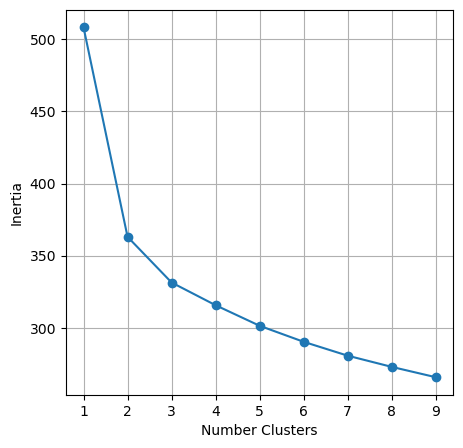

In [16]:
#revisar cuantos clusters crear
#inertia es SSE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
means = []
inertias = []
def optimize_k_means(data,max_k):
    for k in range(1,max_k):
        k_means = KMeans(n_clusters=k, n_init=10)
        k_means.fit(data)
        means.append(k)
        inertias.append(k_means.inertia_)

    fig = plt.subplots(figsize=(5,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimize_k_means(scaled_data,10)

Para este hito, se llevó a cabo la propuesta experimental de la pregunta 1. Sin embargo, después de aplicar K-Means clustering, no se obtuvieron los resultados esperados, y se obtuvo un gráfico difícil de interpretar, ya que consiste en un único cluster con algunos outliers. Por lo tanto, para el próximo hito se tiene pensado ir creando distintos clusters, con los atributos de los obtenidos después de haber realizado una limpieza de datos, y ver si se logran identificar mejores agrupaciones a simple vista.

HITO 3

Para este código, se llevó a cabo de manera más formal lo descrito anteriormente. En primer lugar, se mostrarán los experimentos hechos para la primera pregunta.

Se mostrará el procedimiento hecho para estudiar los datos utilizando K-Means.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



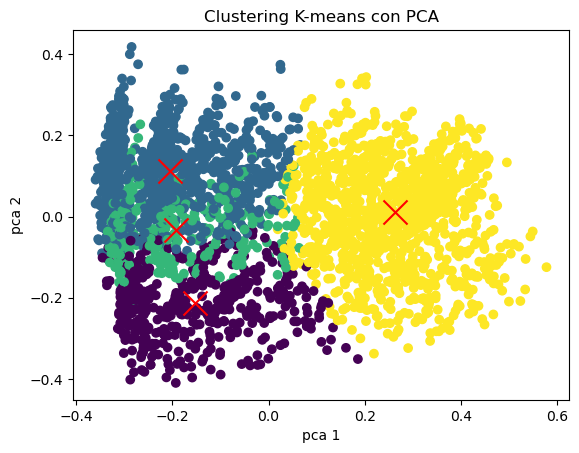

In [17]:
#se hacen dos clusters de kmeans para probar
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4) #se toma el numero de clusters dependiendo del grafico de codo y se hace el kmeans clustering
kmeans.fit(scaled_data)
labels = kmeans.labels_

#estudiar los centroides
centroids = kmeans.cluster_centers_

pca2 = PCA(n_components=2, random_state=0)
x_pca = pca2.fit_transform(scaled_data)

# transformar los centroides al mismo espacio PCA
centroids_pca = pca2.transform(centroids)

#se visualiza el grafico
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='x')
plt.title('Clustering K-means con PCA')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()

Por otro lado, se crearon gráficos que indican los valores de centroides, para evaluar las diferencias de valores en las columnas del dataframe sobre el cluster. 

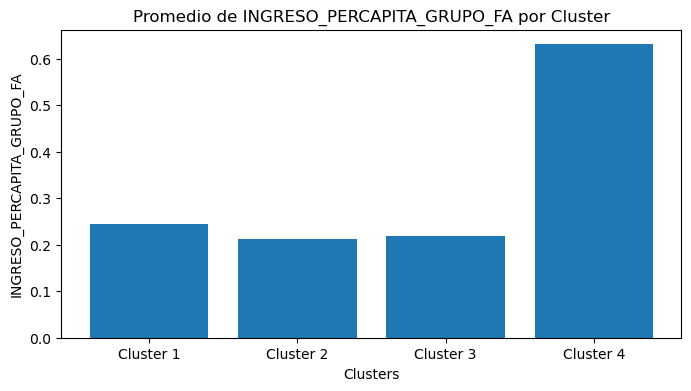

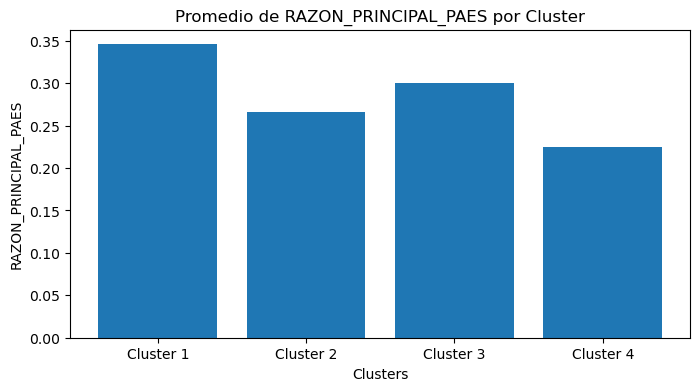

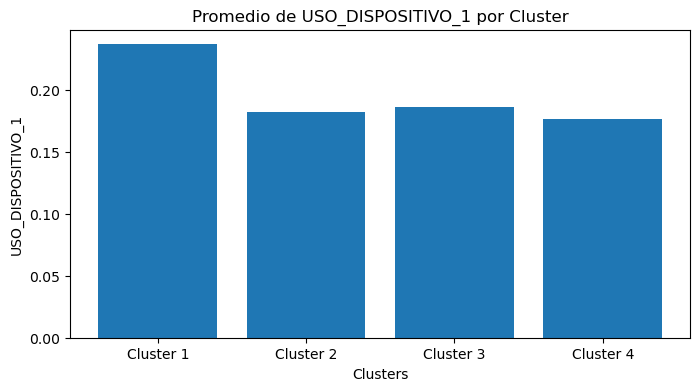

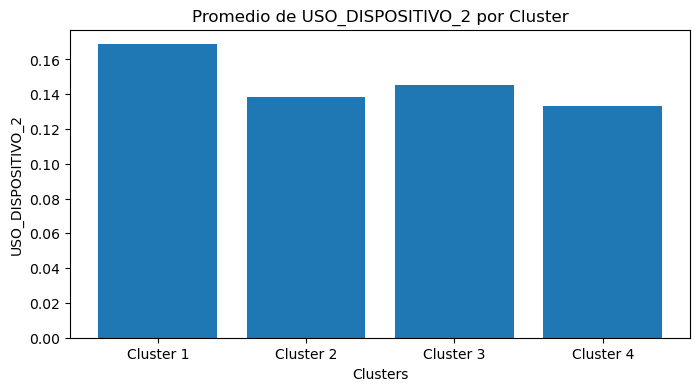

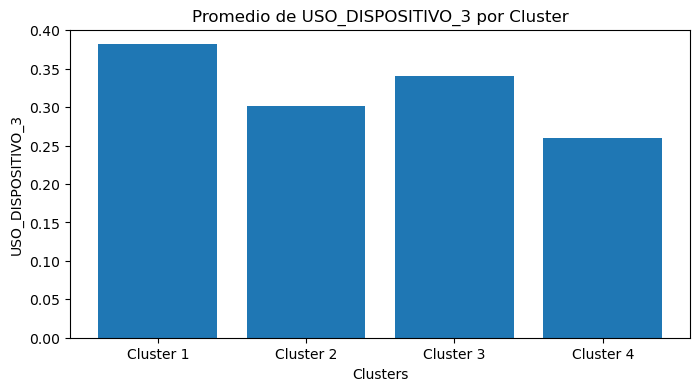

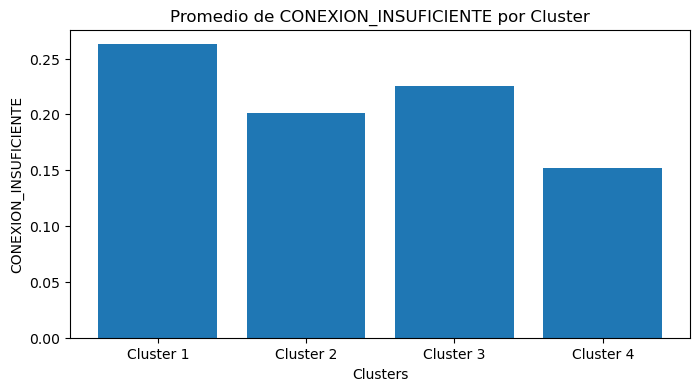

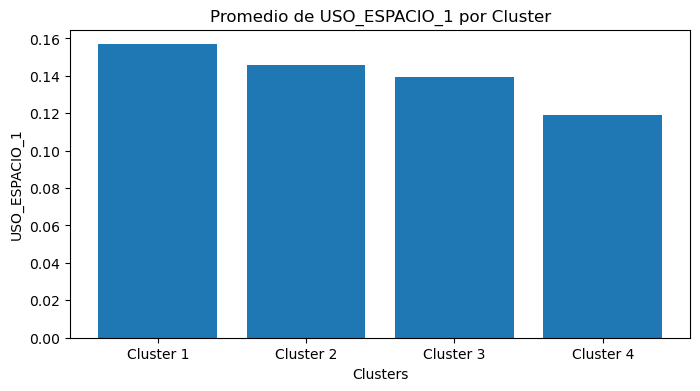

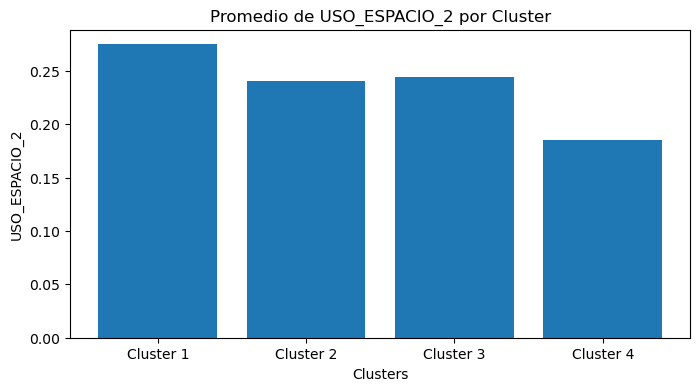

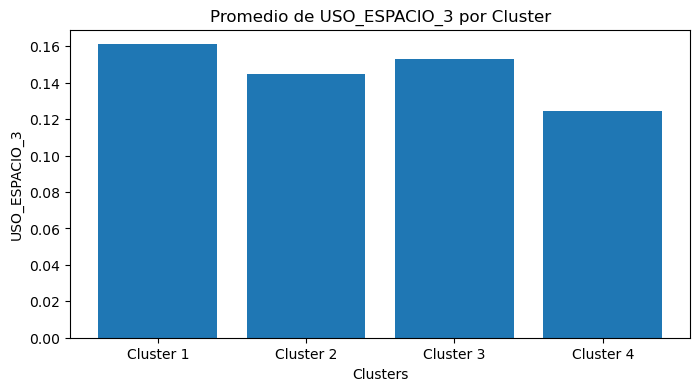

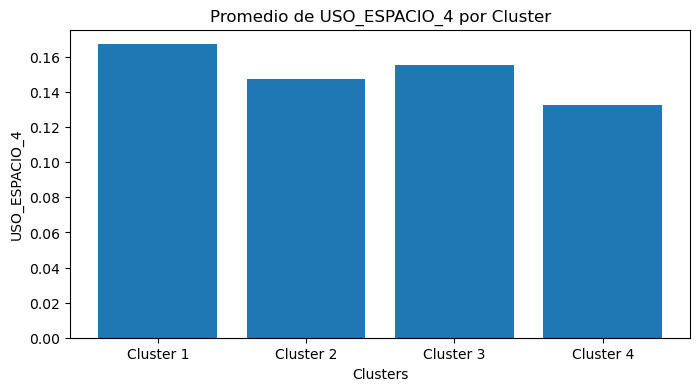

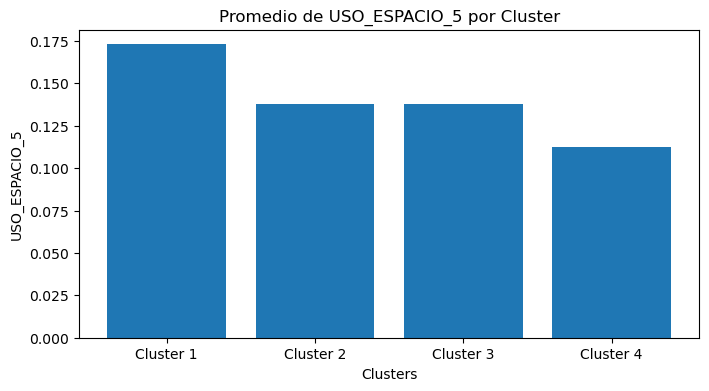

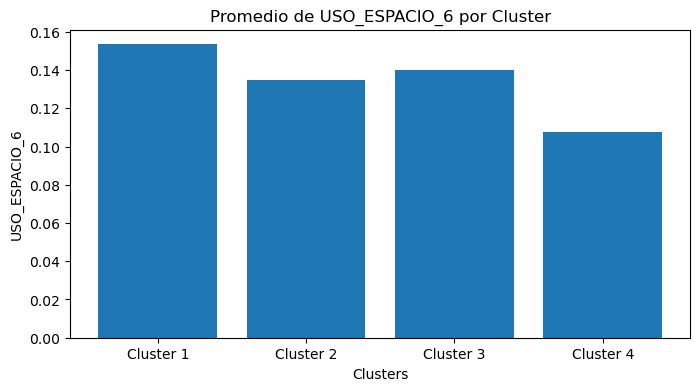

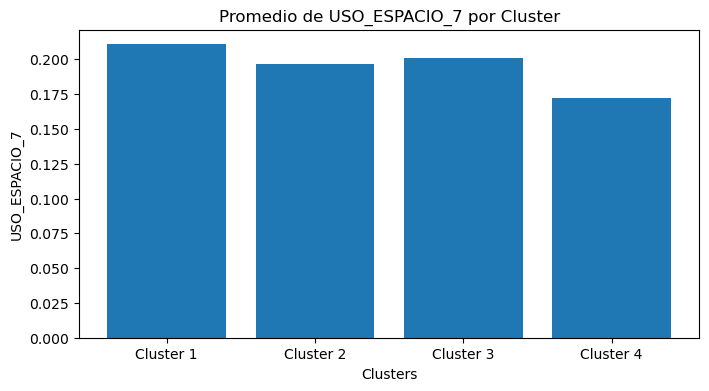

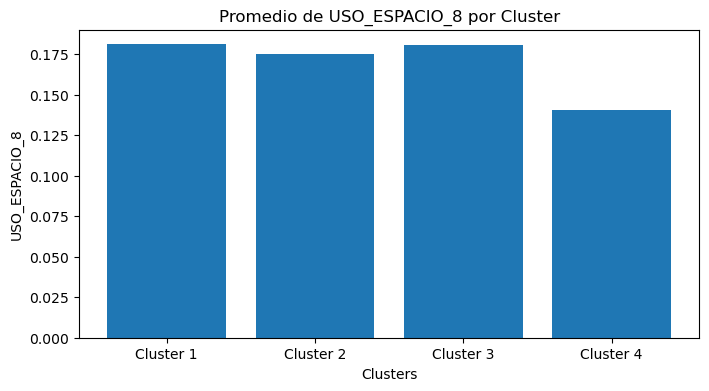

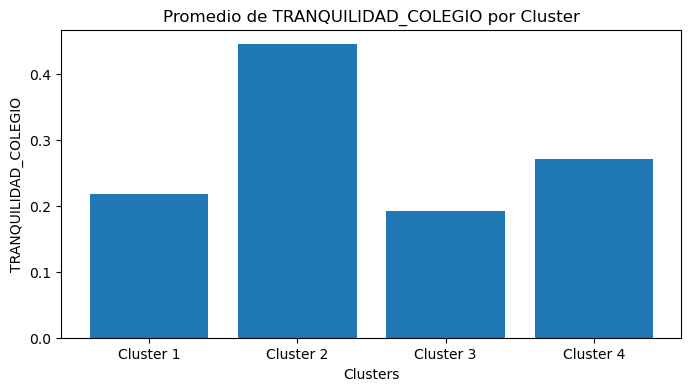

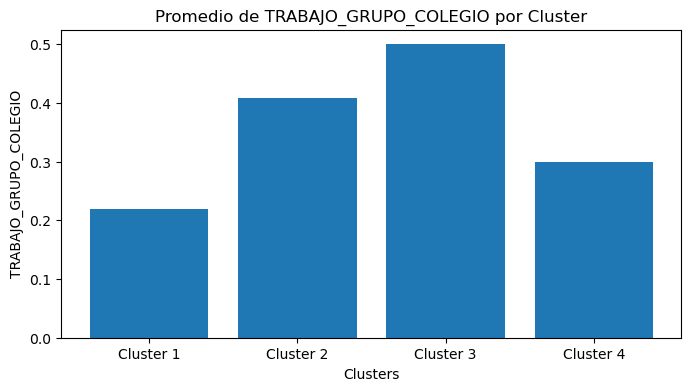

In [18]:
#transformar los centroides a dataframe para estudiarlo
centroids_df = pd.DataFrame(centroids, columns=data.columns.tolist())
# gráfico de barras para cada característica 
for column in centroids_df.columns:
    plt.figure(figsize=(8, 4))
    plt.bar(centroids_df.index, centroids_df[column], tick_label=['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
    plt.xlabel('Clusters')
    plt.ylabel(column)
    plt.title(f'Promedio de {column} por Cluster')
    plt.show()

In [19]:
data['promedio'] = data_promedio
data['label'] = labels
cluster0 = data[data['label']==0]
cluster1 = data[data['label']==1]  
cluster2 = data[data['label']==2]
cluster3 = data[data['label']==3]

In [20]:
cluster0.describe()

INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
count                  481.000000            481.000000         481.000000   
mean                     2.207900              3.054054           2.153846   
std                      1.187794              1.109236           1.166025   
min                      1.000000              1.000000           1.000000   
25%                      1.000000              3.000000           1.000000   
50%                      2.000000              3.000000           2.000000   
75%                      3.000000              3.000000           3.000000   
max                      6.000000              8.000000           4.000000   

       USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  \
count         481.000000         481.000000             481.000000   
mean            1.532225           3.365904               2.288981   
std             0.982928           0.875120               0.936340   
min             1.000000           1.000000               1.000000   
25%             1.000000           3.000000               2.000000   
50%             1.000000           4.000000               2.000000   
75%             2.000000           4.000000               3.000000   
max             4.000000           4.000000               5.000000   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  \
count     481.000000     481.000000     481.000000     481.000000   
mean        1.424116       2.505198       1.451143       1.513514   
std         0.818383       1.343377       0.812791       0.811586   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       USO_ESPACIO_5  USO_ESPACIO_6  USO_ESPACIO_7  USO_ESPACIO_8  \
count     481.000000     481.000000     481.000000     481.000000   
mean        1.577963       1.395010       1.898129       1.646570   
std         0.980355       0.864759       0.894437       0.873113   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       2.000000       1.000000   
75%         2.000000       1.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       TRANQUILIDAD_COLEGIO  TRABAJO_GRUPO_COLEGIO    promedio  label  
count            481.000000             481.000000  481.000000  481.0  
mean               1.956341               1.972973  537.109148    0.0  
std                0.882802               0.750900   89.210957    0.0  
min                1.000000               1.000000  344.000000    0.0  
25%                1.000000               2.000000  475.000000    0.0  
50%                2.000000               2.000000  524.000000    0.0  
75%                2.000000               2.000000  586.500000    0.0  
max                5.000000               5.000000  945.500000    0.0

In [21]:
cluster1.describe()

INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
count                  899.000000            899.000000         899.000000   
mean                     2.271413              2.777531           1.941046   
std                      1.240454              0.849149           1.053087   
min                      1.000000              1.000000           1.000000   
25%                      1.000000              3.000000           1.000000   
50%                      2.000000              3.000000           2.000000   
75%                      3.000000              3.000000           2.000000   
max                      6.000000              8.000000           4.000000   

       USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  \
count         899.000000         899.000000             899.000000   
mean            1.464961           3.183537               2.100111   
std             0.893958           0.966428               0.956160   
min             1.000000           1.000000               1.000000   
25%             1.000000           2.000000               1.000000   
50%             1.000000           4.000000               2.000000   
75%             2.000000           4.000000               3.000000   
max             4.000000           4.000000               5.000000   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  \
count     899.000000     899.000000     899.000000     899.000000   
mean        1.548387       2.557286       1.539488       1.568409   
std         0.836690       1.264471       0.811491       0.804042   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       USO_ESPACIO_5  USO_ESPACIO_6  USO_ESPACIO_7  USO_ESPACIO_8  \
count     899.000000     899.000000     899.000000     899.000000   
mean        1.460512       1.433815       2.094549       1.859844   
std         0.843783       0.857829       0.925368       0.898118   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       2.000000       2.000000   
75%         2.000000       2.000000       3.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       TRANQUILIDAD_COLEGIO  TRABAJO_GRUPO_COLEGIO    promedio  label  
count            899.000000             899.000000  899.000000  899.0  
mean               4.640712               4.271413  545.115128    1.0  
std                0.507132               0.832106   99.524151    0.0  
min                2.000000               1.000000  314.500000    1.0  
25%                4.000000               4.000000  473.000000    1.0  
50%                5.000000               4.000000  531.500000    1.0  
75%                5.000000               5.000000  597.000000    1.0  
max                5.000000               5.000000  920.000000    1.0

In [22]:
cluster2.describe()

INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
count                  316.000000            316.000000         316.000000   
mean                     2.101266              2.863924           1.791139   
std                      1.133557              1.085472           0.989172   
min                      1.000000              1.000000           1.000000   
25%                      1.000000              3.000000           1.000000   
50%                      2.000000              3.000000           1.500000   
75%                      3.000000              3.000000           2.000000   
max                      5.000000              8.000000           4.000000   

       USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  \
count         316.000000         316.000000             316.000000   
mean            1.386076           3.253165               2.136076   
std             0.761991           0.935621               0.878579   
min             1.000000           1.000000               1.000000   
25%             1.000000           3.000000               2.000000   
50%             1.000000           4.000000               2.000000   
75%             2.000000           4.000000               3.000000   
max             4.000000           4.000000               5.000000   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  \
count     316.000000     316.000000     316.000000     316.000000   
mean        1.329114       2.354430       1.465190       1.496835   
std         0.646780       1.272797       0.735963       0.786789   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       USO_ESPACIO_5  USO_ESPACIO_6  USO_ESPACIO_7  USO_ESPACIO_8  \
count     316.000000     316.000000     316.000000     316.000000   
mean        1.313291       1.329114       1.936709       1.734177   
std         0.694615       0.751236       0.895729       0.823602   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       2.000000       2.000000   
75%         1.000000       1.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       TRANQUILIDAD_COLEGIO  TRABAJO_GRUPO_COLEGIO    promedio  label  
count            316.000000              316.00000  316.000000  316.0  
mean               1.822785                4.71519  524.691456    2.0  
std                0.382456                0.45204   93.958504    0.0  
min                1.000000                4.00000  351.500000    2.0  
25%                2.000000                4.00000  461.000000    2.0  
50%                2.000000                5.00000  507.750000    2.0  
75%                2.000000                5.00000  568.500000    2.0  
max                2.000000                5.00000  979.000000    2.0

In [23]:
cluster3.describe()

INGRESO_PERCAPITA_GRUPO_FA  RAZON_PRINCIPAL_PAES  USO_DISPOSITIVO_1  \
count                 1216.000000           1216.000000        1216.000000   
mean                     8.013980              2.800164           2.243421   
std                      1.748077              0.945616           1.125809   
min                      3.000000              1.000000           1.000000   
25%                      7.000000              3.000000           1.000000   
50%                      8.000000              3.000000           2.000000   
75%                     10.000000              3.000000           3.000000   
max                     10.000000              8.000000           4.000000   

       USO_DISPOSITIVO_2  USO_DISPOSITIVO_3  CONEXION_INSUFICIENTE  \
count        1216.000000        1216.000000            1216.000000   
mean            1.706414           3.245888               1.857730   
std             1.063494           0.933809               0.903759   
min             1.000000           1.000000               1.000000   
25%             1.000000           3.000000               1.000000   
50%             1.000000           4.000000               2.000000   
75%             2.000000           4.000000               2.000000   
max             4.000000           4.000000               5.000000   

       USO_ESPACIO_1  USO_ESPACIO_2  USO_ESPACIO_3  USO_ESPACIO_4  \
count    1216.000000    1216.000000    1216.000000    1216.000000   
mean        1.517270       2.344572       1.586349       1.697368   
std         0.864307       1.292786       0.868722       0.897473   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       2.000000       1.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       USO_ESPACIO_5  USO_ESPACIO_6  USO_ESPACIO_7  USO_ESPACIO_8  \
count    1216.000000    1216.000000    1216.000000    1216.000000   
mean        1.429276       1.358553       2.197368       1.782895   
std         0.864441       0.790724       0.975684       0.900244   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       2.000000       2.000000   
75%         1.000000       1.000000       3.000000       2.000000   
max         4.000000       4.000000       4.000000       4.000000   

       TRANQUILIDAD_COLEGIO  TRABAJO_GRUPO_COLEGIO     promedio   label  
count           1216.000000            1216.000000  1216.000000  1216.0  
mean               3.456414               3.782895   611.221628     3.0  
std                1.440076               1.244142   141.870002     0.0  
min                1.000000               1.000000   316.500000     3.0  
25%                2.000000               2.000000   505.875000     3.0  
50%                4.000000               4.000000   578.000000     3.0  
75%                5.000000               5.000000   696.000000     3.0  
max                5.000000               5.000000   993.500000     3.0

Con lo obtenido, se estudiaron las propiedades de los clusters obtenidos utilizando la funcionalidad de describe(), la cual reveló cuál de todos los clusters tiene mejor promedio de los puntajes de los alumnos. 


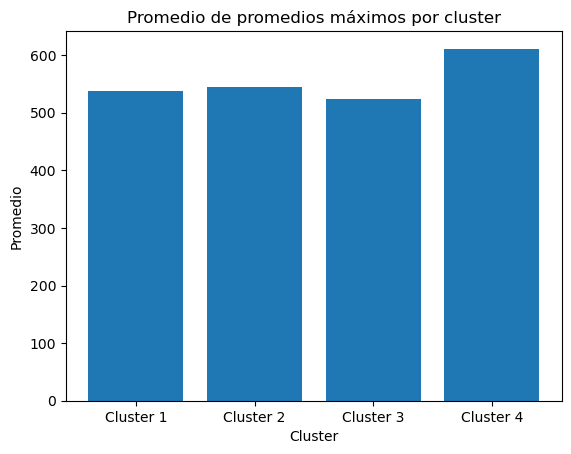

In [24]:
promedio_cluster0 = cluster0['promedio']
promedio_cluster1 = cluster1['promedio']
promedio_cluster2 = cluster2['promedio']
promedio_cluster3 = cluster3['promedio']

plt.bar(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], [promedio_cluster0.mean(), promedio_cluster1.mean(), promedio_cluster2.mean(), promedio_cluster3.mean()])
plt.xlabel('Cluster')
plt.ylabel('Promedio')
plt.title('Promedio  máximos por cluster')
plt.show()

Con lo anterior, se concluyó que realmente no existe una herramienta o lugar de estudio que influya sobre el promedio del alumno, ya que son valores muy parecidos en cada cluster. Sin embargo, si se notó una tendencia sobre el cluster que tiene mejor puntaje, a mayor ingreso per cápita.

Por otro lado, se utilizaron las siguientes medidas de validación del cluster K-Means.

In [25]:
from sklearn.metrics import silhouette_score
print("Dataset X K-Means 2\t", silhouette_score(scaled_data, kmeans.labels_))

Dataset X K-Means 2	 0.19683358982844212


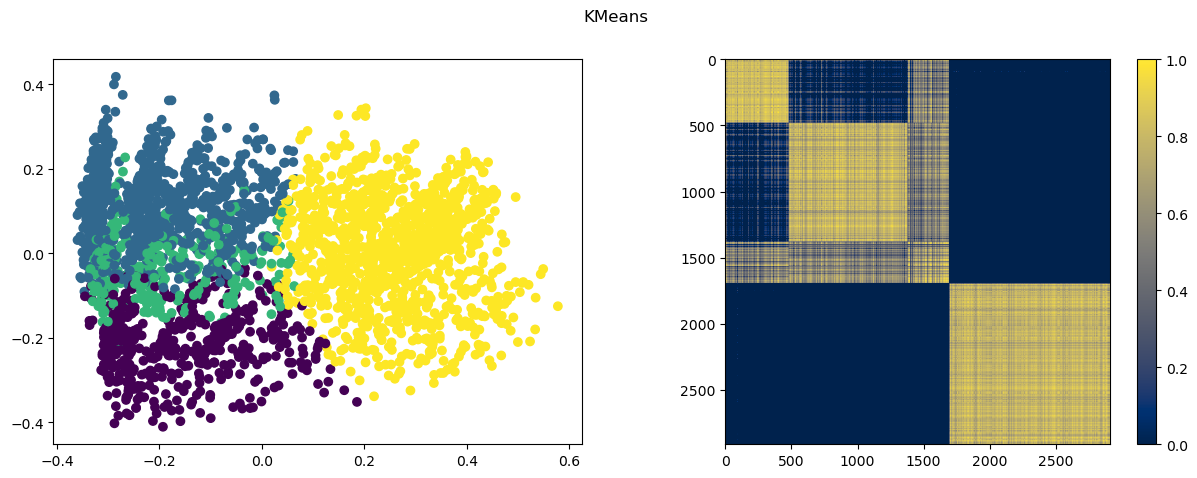

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las similitud entre todos los puntos
    d = cosine_similarity(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    sim = sim_matrix(data, model.labels_)
    im = ax2.imshow(sim, cmap='cividis', vmin=0.0, vmax=1.0)
    fig.colorbar(im, ax=ax2)

plot(x_pca, kmeans)
plt.show()

Por otro lado, se decidió estudiar el problema de la pregunta 1 con DB-Scan, para revisar si existe algún patrón en los clusters formados.

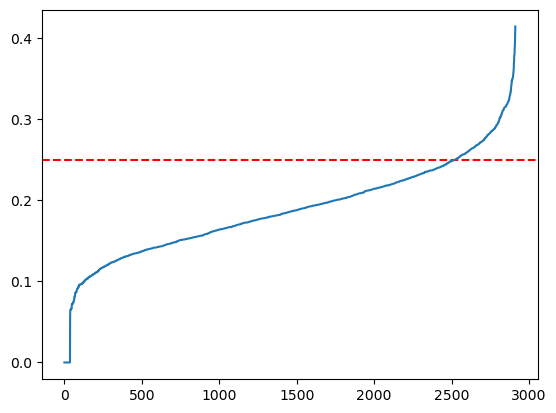

In [27]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=3).fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig, ax = plt.subplots()

ax.axhline(y=0.25, color='r', linestyle='--') # Ajuste el valor para y
ax.plot(distances)

plt.show()

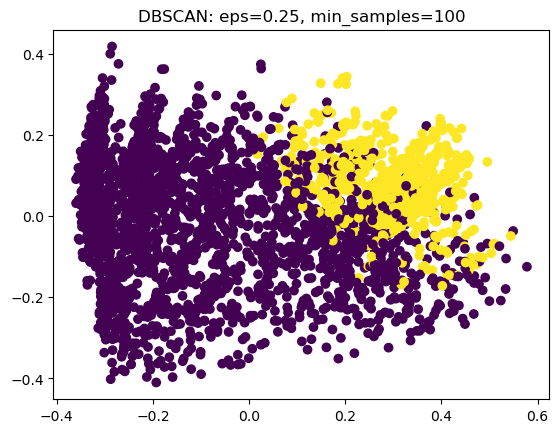

In [28]:
from sklearn.cluster import DBSCAN
eps = 0.25
min_samples = 100

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

Como se observa en el gráfico de dispersión, que representa el cluster de densidad, no existe una clara relación o conclusión, ya que los datos con los que hemos trabajado son muy compactos.

Además, se trabajó con clustering jerárquico, como se muestra a continuación.

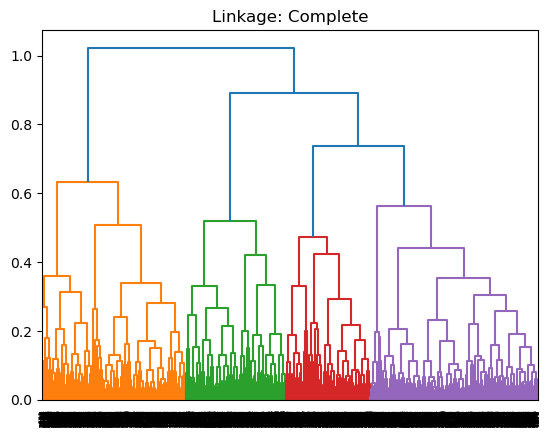

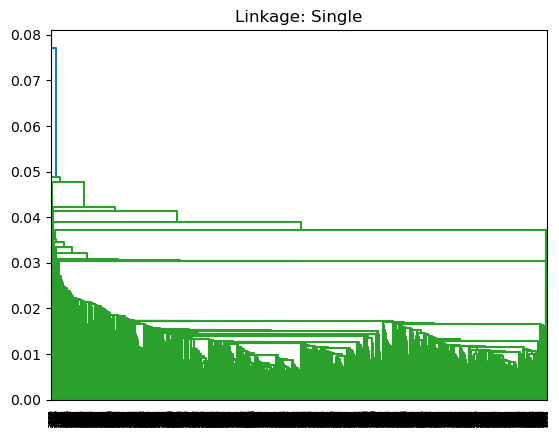

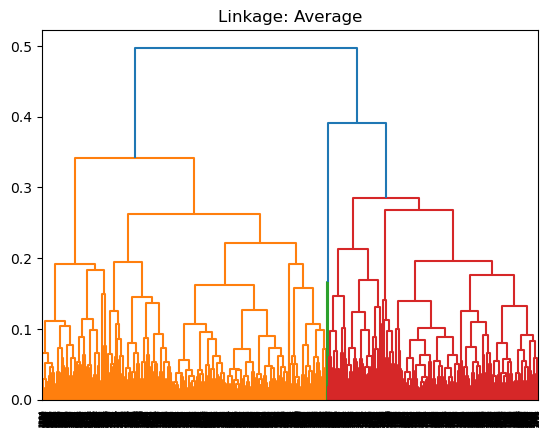

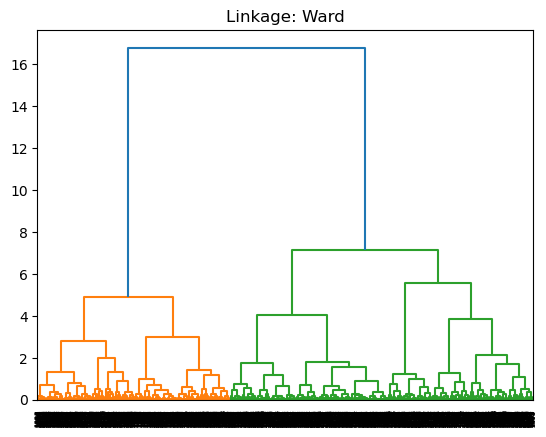

In [29]:
#Clustering jerarquico aglomerativo
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

#PCA para reducir dimensiones
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Seleccionar una muestra aleatoria de 10000 datos para evitar errores de memoria


complete = linkage(pca_data, method='complete')
single = linkage(pca_data, method='single')
average = linkage(pca_data, method='average')
ward = linkage(pca_data, method='ward')

# Graficar los dendrogramas
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

dendrogram(single)
plt.title("Linkage: Single")
plt.show()

dendrogram(average)
plt.title("Linkage: Average")
plt.show()

dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

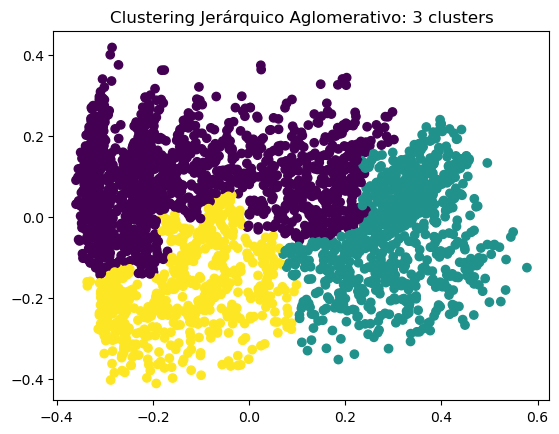

In [30]:
# Seleccionar el método de linkage y el número de clusters para graficar
ward_cluster = AgglomerativeClustering(n_clusters=None,distance_threshold= 0.8, linkage='complete').fit(pca_data)
labels = ward_cluster.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.title('Clustering Jerárquico Aglomerativo: 3 clusters')
plt.show()


Se concluye que el mejor resultado obtenido con el método jerárquico, Ward, es muy similar al de K-Means. Sin embargo, es preferible elegir el modelo de K-Means, ya que el jerárquico tarda mucho más en procesar y no se adapta bien a nuestro problema. Esto se debe a que el método jerárquico no maneja eficientemente grandes volúmenes de datos, lo que resulta en tiempos de procesamiento excesivamente largos.

Ahora, se mostrará el desarrollo utilizado para desarrollar la segunda pregunta.

Para esta parte se discretizó la variable continua de los puntajes promedio de cada alumno que rindió la prueba, el objetivo era tener una discretización con paso de 10 puntos, pero se comenzó probando con paso 100, para evaluar el modelo de clasificación requerido.

In [31]:
data_clas['PROMEDIO_CM_MAX'] = data_promedio_clas
data_clas['PROMEDIO_CM_MAX'] = pd.to_numeric(data_clas['PROMEDIO_CM_MAX'], errors='coerce').astype(int)
data_clas['PROMEDIO_CM_MAX'] = data_clas['PROMEDIO_CM_MAX'].dropna()

data_clas['PUNTAJE_PROM'] = (data_clas['PROMEDIO_CM_MAX']/100).astype(int)*100
del data_clas['PROMEDIO_CM_MAX']
x = data_clas.drop('PUNTAJE_PROM', axis=1)
y = data_clas['PUNTAJE_PROM']

Luego se entrenó un modelo de clasificación para predecir las categorías de puntajes en las que se encontraba un estudiante. Para esto, se había apuntado a usar un árbol de decisión,para el que se buscaron los mejores parámetros con GridSearch, llegando a que la mejor alternativa era particionar las instancias según entropía, y usar la máxima profundidad igual a 2. Primero se obtuvieron malos resultados, por lo que se probó cambiar la forma de limpiar los datos, optimizada para la pregunta de clustering anterior. En este caso, se cambiaron los valores con resultados que no servían para el modelo, por los promedio de cada variable, dando así un mejor resultado, pero que no fue satisfactorio.

Se intentó también usar otros modelos, como la regresión logística o Random Forest, que tuvieron un resultado ligeramente mejor, pero sin cumplir con lo que se esperaba para poder construir el modelo. El resultado del modelo de Random Forest entrenado se puede ver en el classification_report o la matriz de confusión a continuación.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=15)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

         200       1.00      0.00      0.00         9
         300       0.06      0.01      0.01       514
         400       0.35      0.20      0.26      9323
         500       0.40      0.60      0.48     19319
         600       0.31      0.31      0.31     13951
         700       0.20      0.10      0.13      6274
         800       0.18      0.08      0.11      2763
         900       0.15      0.04      0.07       842

    accuracy                           0.35     52995
   macro avg       0.33      0.17      0.17     52995
weighted avg       0.32      0.35      0.32     52995



In [33]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[    0     0     2     5     2     0     0     0]
 [    0     4   148   294    61     7     0     0]
 [    0    19  1890  5532  1561   250    66     5]
 [    0    26  2132 11581  4594   752   201    33]
 [    0    11   902  7413  4329   968   279    49]
 [    0     6   274  2850  2247   605   238    54]
 [    0     1    65  1029  1022   365   211    70]
 [    0     0    23   236   265   130   151    37]]


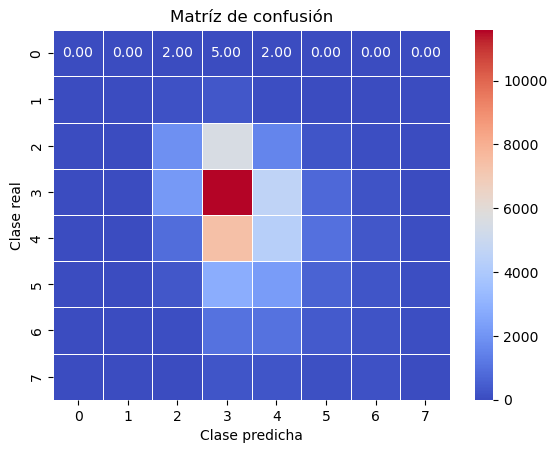

In [34]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matríz de confusión')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         200       0.00      0.00      1.00         9
         300       0.02      0.04      0.03       514
         400       0.25      0.25      0.25      9323
         500       0.39      0.39      0.39     19319
         600       0.29      0.28      0.28     13951
         700       0.16      0.17      0.16      6274
         800       0.11      0.12      0.11      2763
         900       0.09      0.10      0.09       842

    accuracy                           0.29     52995
   macro avg       0.16      0.17      0.29     52995
weighted avg       0.29      0.29      0.29     52995



In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

clf = LogisticRegression(solver='lbfgs', max_iter=1000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         200       1.00      0.00      0.00         9
         300       1.00      0.00      0.00       514
         400       1.00      0.00      0.00      9323
         500       0.38      0.94      0.54     19319
         600       0.29      0.09      0.14     13951
         700       0.30      0.00      0.00      6274
         800       0.29      0.04      0.07      2763
         900       0.10      0.00      0.00       842

    accuracy                           0.37     52995
   macro avg       0.54      0.13      0.09     52995
weighted avg       0.45      0.37      0.24     52995



Se decidió no seguir construyendo el modelo, ya que si la predicción no es buena para pocas clases, al momento de querer analizar variaciones en las variables, que se haría para decidir qué cambio en el hábito o uso de herramientas de estudio priorizar para obtener mejores resultados, esta decisión no sería fiable, dado que depende de la capacidad del modelo de predecir variaciones, lo menores posibles, lo que no es posible con los datos que se tienen.

En conclusión, para obtener mejores resultados en este proyecto, hubiese sido beneficioso trabajar con datos que no tuvieran tantas preguntas con valores nulos o sin respuesta. Además de elegir un conjunto de datos con una mayor cantidad de información. En este caso, elegimos datos únicamente del año 2023, ya que en los años anteriores y posteriores no se realizaron las mismas preguntas que estudiamos ahora.
